In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Dell\IPLSTATS\IPLData.csv")
df.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [11]:
df.isnull().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [13]:
df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum()) 

Player Name            0
Team                   0
Nationality            0
Player_Type            0
Capped                 0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
Catches                0
Run_outs               0
Stumps                 0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_18608\1555966012.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


        Player Name       Team    Runs
208     Virat Kohli  Bangalore  6283.0
0    Shikhar Dhawan     Punjab  5783.0
205   Rohit Sharma      Mumbai  5611.0
19    David Warner       Delhi  5449.0
213        MS Dhoni    Chennai  4746.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_18608\1521653722.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_run_scorers, x="Runs", y="Player Name", palette="viridis")


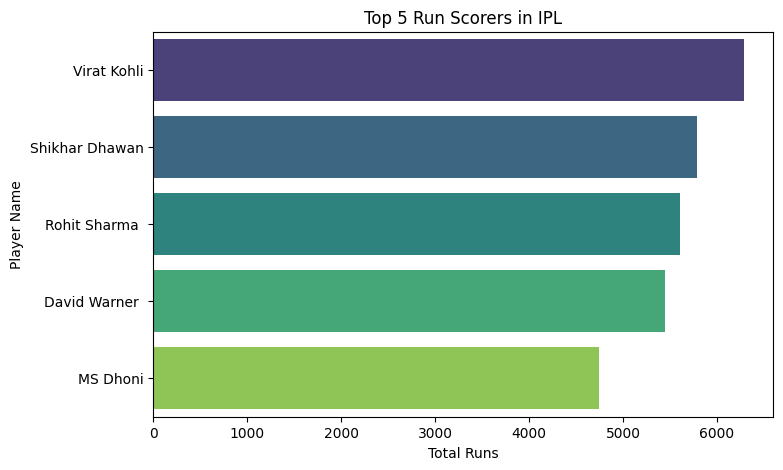

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_run_scorers = df[['Player Name', 'Team', 'Runs']].sort_values(by='Runs', ascending=False).head(5)
print(top_run_scorers)

plt.figure(figsize=(8,5))
sns.barplot(data=top_run_scorers, x="Runs", y="Player Name", palette="viridis")
plt.xlabel("Total Runs")
plt.ylabel("Player Name")
plt.title("Top 5 Run Scorers in IPL")
plt.show()

              Player Name       Team  Wickets
129         Dwayne Bravo     Chennai    167.0
190         Benny Howell      Punjab    150.0
127  Ravichandran Ashwin   Rajasthan    145.0
232         Sunil Narine     Kolkata    143.0
45      Bhuvneshwar Kumar  Hyderabad    142.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_18608\1045362115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wicket_takers, x="Wickets", y="Player Name", palette="coolwarm")


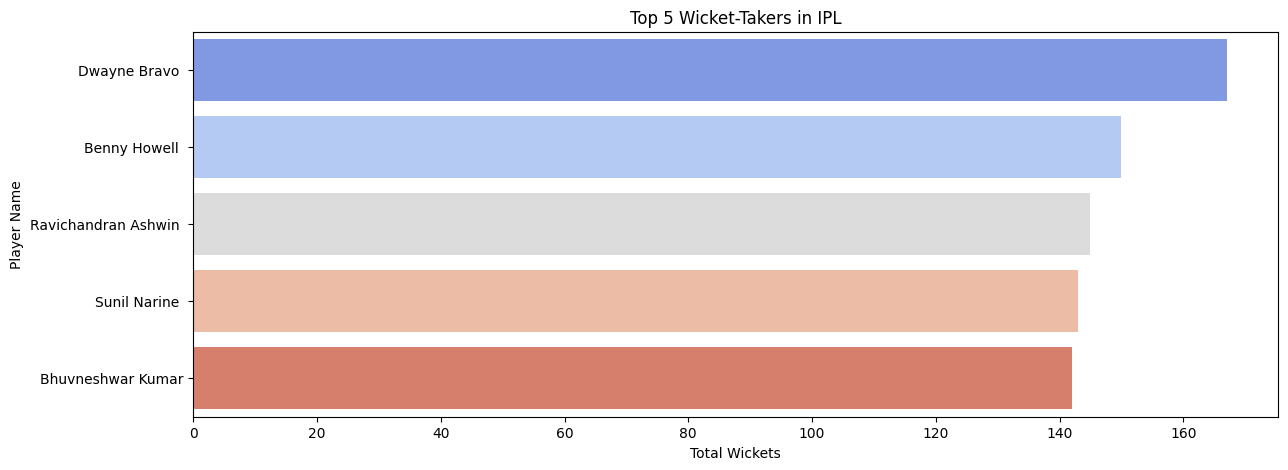

In [17]:
top_wicket_takers = df[['Player Name', 'Team', 'Wickets']].sort_values(by='Wickets', ascending=False).head(5)
print(top_wicket_takers)

# Plot top 5 wicket takers
plt.figure(figsize=(14,5))
sns.barplot(data=top_wicket_takers, x="Wickets", y="Player Name", palette="coolwarm")
plt.xlabel("Total Wickets")
plt.ylabel("Player Name")
plt.title("Top 5 Wicket-Takers in IPL")
plt.show()

         Team     Runs  Wickets
0   Bangalore  18782.0    487.0
1     Chenai    4722.0     19.5
2     Chennai  19300.0    685.0
3       Delhi  16129.0    583.5
4      Delhi     813.0     44.5
5     Gujarat  11900.0    630.0
6    Gujarat     162.0     19.5
7   Hyderabad   8212.0    461.5
8     Kolkata  15403.0    730.5
9     Lucknow  16368.0    539.5
10     Mumbai  17059.0    614.5
11    Mumbai     295.0     20.5
12     Punjab  16716.0    711.5
13  Rajasthan  13064.0    713.5


C:\Users\Dell\AppData\Local\Temp\ipykernel_18608\1052949976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_performance, x="Runs", y="Team", palette="magma")


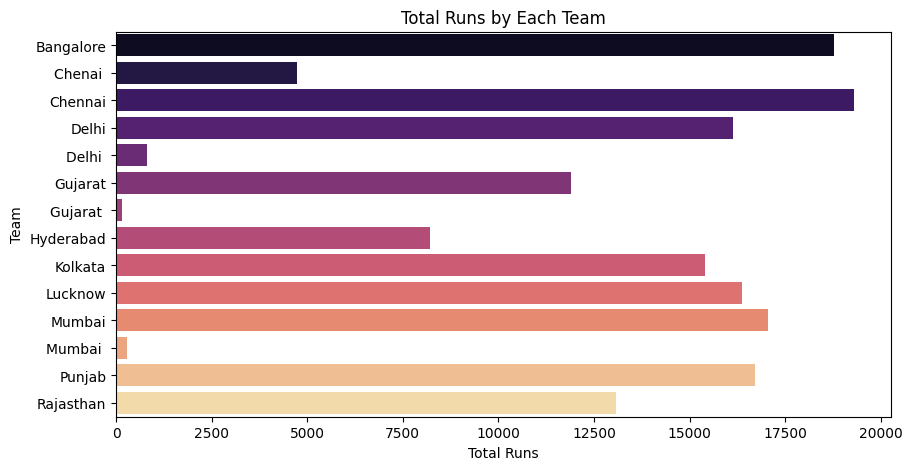

In [18]:
team_performance = df.groupby('Team').agg({'Runs': 'sum', 'Wickets': 'sum'}).reset_index()
print(team_performance)

# Plot team-wise runs
plt.figure(figsize=(10,5))
sns.barplot(data=team_performance, x="Runs", y="Team", palette="magma")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.title("Total Runs by Each Team")
plt.show()